# Ширење на вируси на ER мрежи

## Erdős-Renyi 

Да почнеме со една од наједноставните нецелосни топологии. Оваа топологија првично беше истражена во длабочина кон крајот на 1950-тите од страна на Paul Erdős и Alfred Renyi (*Paul Erdős and Alfred Renyi. On random graphs. Publicationes Mathematicæ, 6:290–297, 1959*) . Тие го нарекоа нивниот пристап „случајни графови“, но тоа е малку погрешно име: можеме да произведеме „случајни мрежи“ со која било топологија како што видовме погоре. За среќа, влијанието на Erdős и Renyi е толку длабоко што мрежите од овој тип сега се нарекуваат **Erdős-Renyi** или **ЕР мрежи**.

````{margin} **Кафе во теореми?**
Alfred Renyi, другата половина од партнерството, e забележан математичар чија многу значајна друга работа беше прилично засенета од неговата прекрасно продуктивна асоцијација со Erdős. Тој беше одговорен за дефиницијата на математичар како „машина за претворање на кафето во теореми“.
````

```{figure} images/erdos_renyi.png
---
width: 40%
align: center
name: image
---
Erdős и Rényi. Левата слика е превземена од Technion. Десната слика од Paul Halmos.
```


Paul Erdős се смета за еден од најплодните математичари на 20-от век. Иако се смета за генијалец, тој според многу извори во суштина не поседувал ништо и патувал меѓу универзитетските математички училишта барајќи проблеми за работа. Тој е исто така многу „централен“ во мрежата на математички коавтори, поради кој има и број специјално за коавторство =  „Erdős-виот број“ (“Erdős number”), кој го мери бројот на коавторства меѓу автори и Erdős. (колку е помал овој број толку е подобро) 

Идејата за ЕР мрежата е дека постои раб помеѓу кој било пар јазли со одредена фиксна веројатност, а постоењето на кој било раб е независно од постоењето на кој било друг.

За едноставен опис на дистрибуцијата на степенот на овие мрежи, кај ER мрежата впечатливо е тоа што исто така е многу едноставна за градење/програмирање. Се избира голем број на јазли $N$ и се гради комплетен граф $K_N$. Комплетниот граф има раб помеѓу секој пар на јазли поради тоа бираме параметар $p_{edge}$ или $\phi$ помеѓу 0 и 1. Сега, се пуштаме за низ сите рабови, и за секој раб бираме случаен број $s$ помеѓу 0 и 1. Ако $s \le p_{edge}$, тогаш го држиме го работ; ако $s> p_ {edge}$, отстрануваме. На овој начин завршиваме со мрежа во која има раб помеѓу секој пар на јазли со веројатност $p_{edge}$. Ако $p_{edge} = 1$ го имаме **комплетниот граф** (секогаш држиме раб); ако $p_ {edge} = 0$ го имаме **празниот график** (никогаш не држиме раб); а за вредностите помеѓу нив имаме повеќе или помалку ретка колекција на рабови.

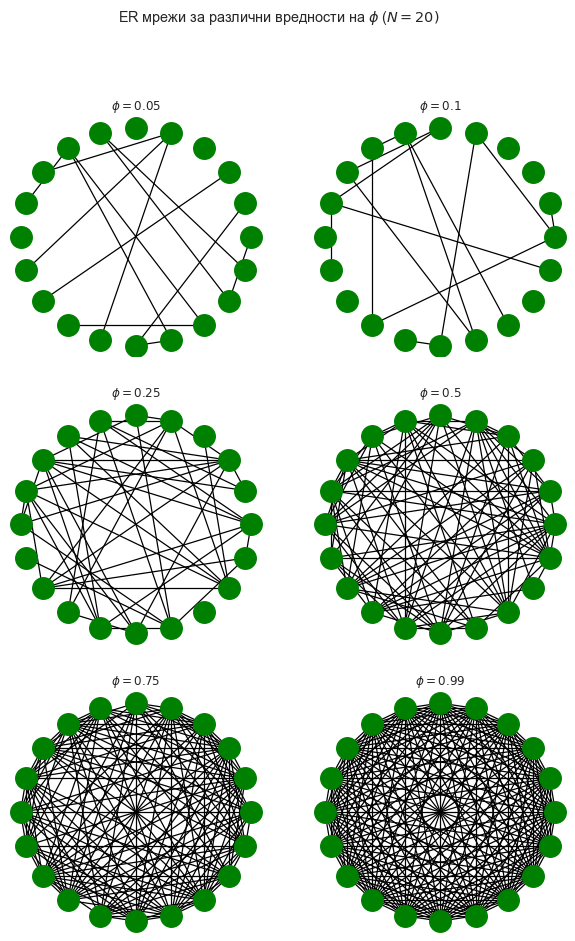

In [2]:
import networkx
import matplotlib
import matplotlib.pyplot as plt
import seaborn
matplotlib.rcParams['figure.dpi'] = 90

matplotlib.style.use('seaborn')
seaborn.set_context("notebook", font_scale=.8)

(fig, axs) = plt.subplots(3, 2, sharex=True, sharey=True,
                          figsize=(8, 12))

# Мала мрежа, 20 јазли
N = 20

# Исцртување на мрежата за различни вредности на phi
for (phi, ax) in [(0.05, axs[0][0]),
                  (0.10, axs[0][1]),
                  (0.25, axs[1][0]),
                  (0.50, axs[1][1]),
                  (0.75, axs[2][0]),
                  (0.99, axs[2][1])]:
    # креирање на ER мрежа
    G = networkx.erdos_renyi_graph(N, phi)

    networkx.draw_circular(G, ax=ax, node_color='green')
    ax.set_title('$\phi = ' + '{p}$'.format(p=phi))

plt.suptitle('ER мрежи за различни вредности на $\phi$ ' + '($N = {n})$'.format(n=N))
plt.savefig('images/2_2_1_er-networks-p.png')
plt.show()

Горе лево каде што $\phi$ е мал, имаме многу малку рабови: 5% од можниот вкупен број, всушност. Како што напредуваме кон долниот десен агол, мрежата станува сè погуста, сè додека на 99% од можните рабови не се поврзани и се тешко да се забележи дека воопшто недостасуваат рабови.

Што е $\langle k \rangle$ за оваа топологија? Одговорот се покажа како доста едноставен. ЕР-мрежата има $\langle k \rangle = \frac{\phi}{N}$. Покрај тоа, дистрибуцијата на степенот - бројот на јазли со повеќе или помалку рабови од просечната, е $нормална дистрибуција$, „bell curve“ што ја гледаме во многу феномени.

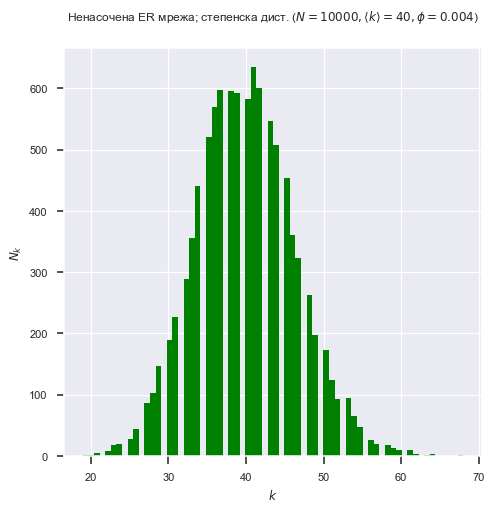

In [3]:
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()

# пример мрежа
N = 10000
kmean = 40
phi = (kmean + 0.0) / N

# градење на мрежа
g = networkx.gnp_random_graph(N, phi)
#G = networkx.erdos_renyi_graph(N, phi)

# цртање на степенската дистрибуција
ks = list(dict(networkx.degree(g)).values())
ax.hist(ks, bins=max(ks), color="green")
ax.set_title('Ненасочена ER мрежа; степенска дист. ($N = {n}, \\langle k \\rangle = {k}'.format(n=N, k=kmean) + ', \phi = ' + '{p}$)'.format(p=phi), y=1.05)
ax.set_xlabel('$k$')
ax.set_ylabel('$N_k$')

plt.savefig('images/2_2_2_degree-distribution-er.png')
plt.show()

Значи, околу една третина од јазлите (околу 650) имаат степен околу просекот (40), при што бројот на јазли со повеќе (или помалку) соседи опаѓа од двете страни на средната вредност. Постојат многу малку јазли со степени во единечни фигури, и многу малку со степени двојно повисоки - и нема со навистина голем степен. Всушност, за секоја мрежа ќе има **минимален степен** $k_{min}$ и **максимален степен** $k_{max}$. Дистрибуцијата на степени на мрежата ЕР вели дека максималниот степен никогаш не е „премногу далеку“ од просечниот (mean).

После целата таа теорија за мрежата, конечно можеме да си поставиме прашање поврзано со болести: што се случува кога варираме $\langle k \rangle = {k}$? Веќе знаеме дека кога $\langle k \rangle = {k} = (N − 1)$ мрежата има целосно мешање - комплетен граф. Но, што се случува кога $\langle k \rangle$ станува сè помал - односно луѓето имаат се помалку контакти едни со други - за истата болест? Веројатно би очекувале дека помалку луѓе ќе се заразат во целина, што исто така сугерира дека болеста во одреден момент едноставно ќе изумре без воопшто да влијае на многу луѓе.

За таа цел се обидов да направам интересна визуелизација. 

Ги земеме истите параметри за големината на мрежата и болеста што ги имавме порано. 

In [4]:
N = 2000
T = 5000
pInfected = 0.01
pInfect = 0.0001
pRemove = 0.001

Но, наместо да градиме комплетен граф, ќе градиме мрежи за ER и ќе видиме што ќе се случи додека го менуваме бројот за дистрибуцијата на степени $\langle k \rangle$.

In [5]:
# Python3 imports 
from scipy.integrate import odeint
import numpy as np
import math
import plotly.graph_objects as go
import plotly.tools as tls
from plotly.validators.scatter.marker import SymbolValidator
from plotly.offline import plot, iplot, init_notebook_mode
from IPython.core.display import display, HTML
import epydemic
import networkx
import matplotlib.pyplot as plt


init_notebook_mode(connected = True)
config={'showLink': False, 'displayModeBar': False}

raw_symbols = SymbolValidator().values
namestems = []
namevariants = []
symbols = []
for i in range(0,len(raw_symbols),3):
    name = raw_symbols[i+2]
    symbols.append(raw_symbols[i])
    namestems.append(name.replace("-open", "").replace("-dot", ""))
    namevariants.append(name[len(namestems[-1]):])


class MonitoredSIR(epydemic.SIR, epydemic.Monitor):
    '''A monitored epidemic.'''''

    def __init__(self):
        super(MonitoredSIR, self).__init__()

    def build(self, params):
        '''Build the observation process.

        :param params: the experimental parameters'''
        super(MonitoredSIR, self).build(params)

        self.trackNodesInCompartment(epydemic.SIR.SUSCEPTIBLE)
        self.trackNodesInCompartment(epydemic.SIR.REMOVED)


def network_sir(T, g, pInfected, pInfect, pRemove):
    m = MonitoredSIR()
    m.setMaximumTime(T)
    e = epydemic.SynchronousDynamics(m, g)

    param = dict()
    param[epydemic.SIR.P_INFECTED] = pInfected
    param[epydemic.SIR.P_INFECT] = pInfect
    param[epydemic.SIR.P_REMOVE] = pRemove
    param[epydemic.Monitor.DELTA] = T / 50

    rc = e.set(param).run()

    results = e.experimentalResults()[MonitoredSIR.TIMESERIES]
    ts = results[MonitoredSIR.OBSERVATIONS]
    sss = results[epydemic.SIR.SUSCEPTIBLE]
    iss = results[epydemic.SIR.INFECTED]
    rss = results[epydemic.SIR.REMOVED]

    return (ts, sss, iss, rss)


epidemics = {}
data = []
for kmean in range(0, 101, 1):
    phi = (kmean + 0.0) / N
    g = networkx.gnp_random_graph(N, phi)

    epidemics[kmean] = network_sir(T, g, pInfected, pInfect, pRemove)

    (sim_ts, sim_sss, sim_iss, sim_rss) = epidemics[kmean]


    data_1 = go.Scatter(x = sim_ts, 
                        y = sim_sss, 
                        mode='markers',
                        visible = False,
                        marker_color="blue",
                        marker_symbol=symbols[5],
                        name = "Подлежни; <i>S(t)</i>",
                        hovertemplate = '<i> %{y:.0f} </i> луѓе')


    data_2 = go.Scatter(x = sim_ts, 
                        y = sim_iss,
                        mode='markers',
                        visible = False,
                        marker_color="red",
                        marker_symbol=symbols[5],
                        name = "Заразени; <i>I(t)</i>",
                        hovertemplate = '<i> %{y:.0f} </i> луѓе')


    data_3 = go.Scatter(x = sim_ts,
                        y = sim_rss, 
                        mode='markers',
                        visible = False,
                        marker_color="green",
                        marker_symbol=symbols[5],
                        name = "Оздравени; <i>R(t)</i>",
                        hovertemplate = '<i> %{y:.0f} </i> луѓе')

    data.append(data_1)
    data.append(data_2)
    data.append(data_3)

# Број на траги
data_len = len(data)

# Направи ги трагите за 50-та вредност видливи
data[150]['visible'] = True
data[151]['visible'] = True
data[152]['visible'] = True

# Креирај slider
steps = []
for i in range(0, 101, 1):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False]*data_len],
        label = str(i))
    for j in range(0,3):
        step['args'][1][i*3+j] = True 
    
    steps.append(step)

sliders = [dict(
    active = 50,
    currentvalue = {'prefix':
                    "⟨k⟩ = <b>"},
    pad = {"t": 80, "b": 10},
    steps = steps
)]

# Изглед на фигура
layout = go.Layout(title = 'SIR преку ER мрежи (N = {n}'.format(n=N) + 
                   ', p<sub>infect</sub> = ' + '{b:.4f}'.format(b=pInfect) + ', p<sub>remove</sub> = ' + '{a})'.format(a=pRemove),
                  title_x = 0.5, 
                  xaxis_title='<i>t</i>',
                  xaxis=dict(range=[0,5000], 
                             mirror=False,
                             ticks='outside',
                             showline=True,
                             tickvals = [0, 1000, 2000, 3000, 4000, 5000],
                             linecolor='#000',
                             tickfont = dict(size=11)),
                  yaxis_title='<i>N</i>',
                  yaxis=dict(range=[0,2000], 
                             mirror=False,
                             ticks='outside', 
                             showline=True,
                             showspikes = True,
                             linecolor='#000',
                             tickvals = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000], 
                             tickfont = dict(size=11)),
                  plot_bgcolor='#fff', 
                  hovermode = 'x unified',
                  width = 700, 
                  height = 450,
                  sliders = sliders,
                  font = dict(size = 10),
                  margin=go.layout.Margin(l=50,
                                         r=50,
                                         b=60,
                                         t=35))

# Прикажи фигура 
fig5 = dict(data=data, layout=layout)
plot(fig5, filename = 'fig5.html', config = config)
display(HTML('fig5.html'))

Доколку ги споредиме графиците со оние порано и ќе ги видите истите шеми: менувањето на $\langle k \rangle$ го има истиот ефект како и менувањето на $p_{infect}$ ($\beta$) во смисла на поместување на врвот на инфекциите.